<img src="./logo.png"><br>
* ref : https://www.kaggle.com/uciml/iris
* ref : https://archive.ics.uci.edu/ml/datasets.php

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC



                                                      #y_true, y_pred
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,  f1_score
from sklearn.metrics import precision_recall_curve    #y_true, probas_pred
from sklearn.metrics import roc_auc_score, roc_curve  #y_true, y_score

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# Data Load

In [89]:
df = pd.read_csv("./dataset/gg_titanic.csv")

In [90]:
# print(df.shape)
# print(df.info())
df.head(1)

,Pclass,Cabin,Embarked,Name_title,Sex,Fare_binning,Age_binning,family_binning,Survived
0,3,0,1,3,1,1,3,2,0


# EDA

# 가공

# 모델학습 & 평가

In [91]:
y = df['Survived']
X = df.drop(['Survived'], axis=1)
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [92]:
from xgboost import XGBClassifier  #XGBoost Wrapper - sklearn
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier

model1 = RandomForestClassifier()
model2 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=1234)
model3 = LGBMClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, random_state=1234) 
model4 = VotingClassifier( [('rf', RandomForestClassifier()),('lr', LogisticRegression())], 
                         voting="hard")
model5 = BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                          n_estimators = 10,max_samples = 1.0,
                          max_features = 1.0, bootstrap = True, 
                          oob_score = False, random_state = 1234)
model_list = [('dt',DecisionTreeClassifier()), 
              ('rf',model1), 
              ('xgboost',model2), 
              ('lgbm',model3) , 
              ('voting',model4), 
              ('bagging',model5)]

list1 = []
list2 = []
list3 = []
for tupl in model_list:
    model_name = tupl[0]
    model = tupl[1]
    #--- 점수 ---
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='macro')
    #print(f"f1:{f1:.4f} accuracy:{accuracy:.4f}")
    
    list1.append(model_name)
    list2.append(accuracy)
    list3.append(f1)


[17:36:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [93]:
score_df = pd.DataFrame( {"model_name": list1, "score_acc":list2, "score_f1":list3})
score_df.head(10)

,model_name,score_acc,score_f1
0,dt,0.798883,0.788860
1,rf,0.798883,0.789906
2,xgboost,0.804469,0.795241
3,lgbm,0.810056,0.801578
4,voting,0.776536,0.753240
5,bagging,0.782123,0.770671


<AxesSubplot:>

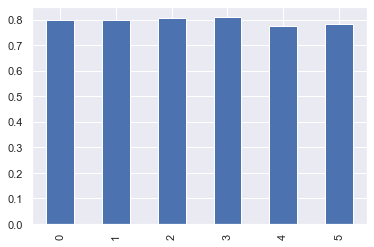

In [94]:
score_df['score_acc'].plot(kind='bar')

<AxesSubplot:>

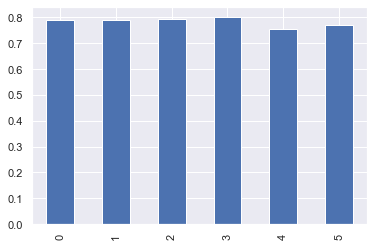

In [95]:
score_df['score_f1'].plot(kind='bar')

# Stacking

<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTA3MTdfMjc2/MDAxNTYzMzQ5NjU5ODcx.xasXZX5BvAyc1Vi4N38YETZF9LWIiA_tVrekRl5cPGUg.ROsl3frSOb8AtKARCFiR0Ox6_Jux1BXHFpmBcsm0btkg.PNG.ckdgus1433/image.png?type=w800">

<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTA3MTdfMjQy/MDAxNTYzMzQ5ODcyMDUy.PmgHPqhpNM6dRUgh4RVtfuzqJKAfJhvchRZ0WeafOqAg.G4ZlayQjF2ZTe8HFhniOo_WkGkzdFgx4UKKAerkmKMIg.PNG.ckdgus1433/image.png?type=w800">

In [96]:
rf = RandomForestClassifier()
lg = LogisticRegression()
dt = DecisionTreeClassifier()

In [97]:
y = df['Survived']
X = df.drop(['Survived'], axis=1)
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
X_train.shape,X_test.shape, y_train.shape, y_test.shape


((712, 8), (179, 8), (712,), (179,))

In [98]:
rf_yellow = np.zeros( (X_train.shape[0], 1) )
lg_yellow = np.zeros( (X_train.shape[0], 1) )
dt_yellow = np.zeros( (X_train.shape[0], 1) )
print(rf_yellow.shape)

(712, 1)


In [99]:
rf_green = np.zeros( (X_test.shape[0], 5) )
lg_green = np.zeros( (X_test.shape[0], 5) )
dt_green = np.zeros( (X_test.shape[0], 5) )
print(rf_green.shape)

(179, 5)


In [100]:
from sklearn.model_selection import StratifiedKFold
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=1414)
for i, (train_idx, val_idx) in enumerate(sk.split(X_train, y_train)):
    X_train_fold, y_train_fold = X_train.iloc[train_idx] , y_train.iloc[train_idx]
    X_val_fold  , y_val_fold   = X_train.iloc[val_idx]   , y_train.iloc[val_idx]

    rf.fit(X_train_fold, y_train_fold)
    lg.fit(X_train_fold, y_train_fold)
    dt.fit(X_train_fold, y_train_fold)

    rf_pred = rf.predict(X_val_fold)
    lg_pred = lg.predict(X_val_fold)
    dt_pred = dt.predict(X_val_fold)

    rf_yellow[val_idx, :] = rf_pred.reshape(-1, 1)
    lg_yellow[val_idx, :] = lg_pred.reshape(-1, 1)
    dt_yellow[val_idx, :] = dt_pred.reshape(-1, 1)

    #-------------------test----------------------
    rf_pred = rf.predict(X_test)
    lg_pred = lg.predict(X_test)
    dt_pred = dt.predict(X_test)

    rf_green[:, i] = rf_pred
    lg_green[:, i] = lg_pred
    dt_green[:, i] = dt_pred

rf_green_mean = np.mean(rf_green, axis=1).reshape(-1,1)       
lg_green_mean = np.mean(lg_green, axis=1).reshape(-1,1)   
dt_green_mean = np.mean(dt_green, axis=1).reshape(-1,1)   


new_train = np.concatenate([rf_yellow, lg_yellow, dt_yellow], axis=1)

new_test = np.concatenate([rf_green_mean, lg_green_mean, dt_green_mean], axis=1)
print(new_train.shape, new_test.shape)

(712, 3) (179, 3)


In [101]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, random_state=1234)        
model.fit(new_train, y_train)   # , eval_set=[(X_test, y_test)]        
pred = model.predict(new_test)

accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='macro')
print(f"f1:{f1:.4f} accuracy:{accuracy:.4f}")


f1:0.7745 accuracy:0.7765


# Stacking : StackingClassifier

In [102]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
# LogisticRegression  DecisionTreeClassifier  LinearSVC
model1 = [('rf', RandomForestClassifier()),
          ('lr', LogisticRegression()),
          ('dt', DecisionTreeClassifier())
         ]
model2 = LGBMClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, random_state=1234)        

stacking_model = StackingClassifier(estimators    = model1, 
                           final_estimator= model2, 
                           cv=5)
stacking_model.fit(X_train, y_train)   
pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='macro')
print(f"f1:{f1:.4f} accuracy:{accuracy:.4f}")


f1:0.7718 accuracy:0.7821


# Pipeline

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [105]:
pipe = Pipeline([ ('scaling', StandardScaler()), ('model',DecisionTreeClassifier() ) ])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"f1:{f1:.4f} accuracy:{accuracy:.4f}")

f1:0.7338 accuracy:0.7933
